## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Data Preprocessing

### Training Image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[156.25 145.25 151.25]
   [154.5  143.5  149.5 ]
   [158.5  147.5  153.5 ]
   ...
   [140.5  127.5  134.5 ]
   [131.75 118.75 125.75]
   [130.   117.   124.  ]]

  [[161.25 150.25 156.25]
   [158.   147.   153.  ]
   [157.   146.   152.  ]
   ...
   [122.75 109.75 116.75]
   [129.5  116.5  123.5 ]
   [135.5  122.5  129.5 ]]

  [[159.   148.   154.  ]
   [159.75 148.75 154.75]
   [150.   139.   145.  ]
   ...
   [135.75 122.75 129.75]
   [135.25 122.25 129.25]
   [129.   116.   123.  ]]

  ...

  [[172.5  160.5  160.5 ]
   [192.   180.   180.  ]
   [193.5  181.5  181.5 ]
   ...
   [126.   107.   109.  ]
   [126.5  107.5  109.5 ]
   [125.   106.   108.  ]]

  [[176.75 164.75 164.75]
   [180.25 168.25 168.25]
   [193.5  181.5  181.5 ]
   ...
   [112.75  93.75  95.75]
   [129.   110.   112.  ]
   [137.75 118.75 120.75]]

  [[177.75 165.75 165.75]
   [190.25 178.25 178.25]
   [175.   163.   163.  ]
   ...
   [122.75 103.75 105.75]
   [123.25 104.25 106.25]
   [130.5  111.5  11

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

In [8]:
model = Sequential()

In [9]:
## Building Convolution Layer

In [10]:
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))

In [13]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2,strides=2))

In [15]:
model.add(Dropout(0.5)) # To avoid Overfitting

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(512, activation='relu'))

In [18]:
model.add(Dropout(0.5))

In [19]:
model.add(Dense(38, activation='softmax'))

### Compiling Model

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                        

### Model Training

In [22]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 205s 86ms/step - loss: 1.6950 - accuracy: 0.5492 - val_loss: 0.5466 - val_accuracy: 0.8298
Epoch 2/10
2197/2197 [==============================] - 189s 86ms/step - loss: 0.6273 - accuracy: 0.8072 - val_loss: 0.4108 - val_accuracy: 0.8719
Epoch 3/10
2197/2197 [==============================] - 189s 86ms/step - loss: 0.3829 - accuracy: 0.8796 - val_loss: 0.2763 - val_accuracy: 0.9121
Epoch 4/10
2197/2197 [==============================] - 189s 86ms/step - loss: 0.2648 - accuracy: 0.9166 - val_loss: 0.2180 - val_accuracy: 0.9276
Epoch 5/10
2197/2197 [==============================] - 192s 87ms/step - loss: 0.1954 - accuracy: 0.9377 - val_loss: 0.1947 - val_accuracy: 0.9371
Epoch 6/10
2197/2197 [==============================] - 192s 88ms/step - loss: 0.1541 - accuracy: 0.9507 - val_loss: 0.1632 - val_accuracy: 0.9484
Epoch 7/10
2197/2197 [==============================] - 190s 86ms/step - loss: 0.1167 - accuracy: 0.9621 - val_loss: 0

## Model Evaluation

In [23]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 55s 25ms/step - loss: 0.0367 - accuracy: 0.9876


In [24]:
print(train_loss,train_acc)

0.03671536222100258 0.9875524640083313


In [25]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 14s 25ms/step - loss: 0.0812 - accuracy: 0.9741


In [26]:
print(val_loss,val_acc)

0.08120482414960861 0.9741065502166748


### Saving Model

In [27]:
model.save("trained_model.h5")

In [28]:
training_history.history

{'loss': [1.695008635520935,
  0.6272556185722351,
  0.3829185962677002,
  0.26483970880508423,
  0.1954106241464615,
  0.15411536395549774,
  0.11666321754455566,
  0.09930089861154556,
  0.0875096246600151,
  0.07177772372961044],
 'accuracy': [0.5491713285446167,
  0.8071697950363159,
  0.8796358108520508,
  0.9166370034217834,
  0.9376627206802368,
  0.950707733631134,
  0.9620599150657654,
  0.9683049917221069,
  0.971747636795044,
  0.9774805903434753],
 'val_loss': [0.5465896129608154,
  0.4108200967311859,
  0.2763027250766754,
  0.21798183023929596,
  0.19468355178833008,
  0.16323626041412354,
  0.10480417311191559,
  0.16148966550827026,
  0.0731179490685463,
  0.08120476454496384],
 'val_accuracy': [0.8297860026359558,
  0.8718984723091125,
  0.9121329188346863,
  0.9276121258735657,
  0.9371158480644226,
  0.9483838081359863,
  0.9648303985595703,
  0.9517983198165894,
  0.9784315824508667,
  0.9741065502166748]}

In [29]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [30]:
training_history.history['val_accuracy']

[0.8297860026359558,
 0.8718984723091125,
 0.9121329188346863,
 0.9276121258735657,
 0.9371158480644226,
 0.9483838081359863,
 0.9648303985595703,
 0.9517983198165894,
 0.9784315824508667,
 0.9741065502166748]

### Accuracy Visualization

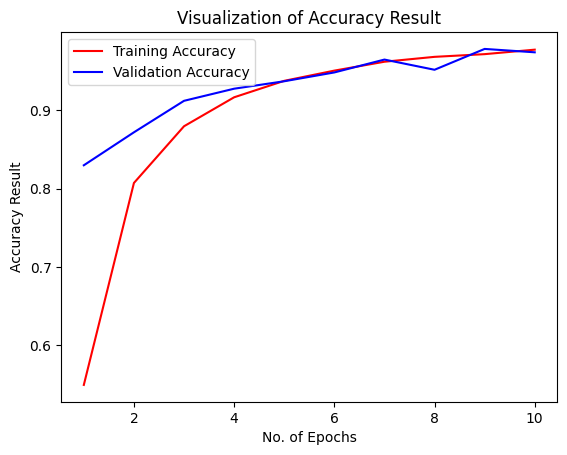

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [32]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 13s 23ms/step


(array([[1.0000000e+00, 5.2541953e-08, 1.4773471e-10, ..., 3.6135905e-16,
         1.7141316e-14, 6.5420752e-14],
        [9.9999976e-01, 2.8387197e-07, 2.5448932e-09, ..., 7.0842503e-15,
         4.9360158e-13, 1.5423005e-11],
        [1.0000000e+00, 2.5452881e-08, 3.2667577e-11, ..., 8.1660287e-16,
         7.4000297e-15, 5.9073791e-13],
        ...,
        [1.2737232e-12, 2.1865359e-13, 4.0713828e-09, ..., 3.6405100e-14,
         5.4877533e-13, 9.9999940e-01],
        [7.7633852e-13, 3.4291607e-14, 2.7662297e-10, ..., 5.1165123e-15,
         1.2982491e-12, 1.0000000e+00],
        [2.9826430e-11, 1.9415331e-13, 5.1147832e-12, ..., 3.1775691e-15,
         7.9991271e-11, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [35]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

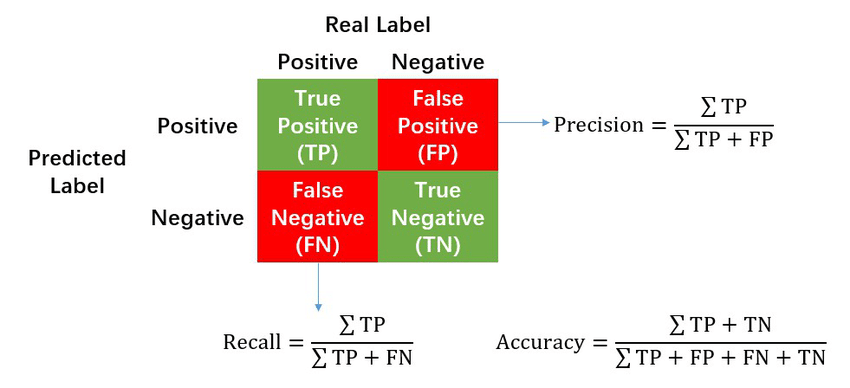

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.98      0.97       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.97      1.00      0.98       440
                                   Apple___healthy       0.96      0.97      0.96       502
                               Blueberry___healthy       0.93      1.00      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.97      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.93      0.

In [41]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[495,   2,   0, ...,   0,   0,   0],
       [  5, 490,   0, ...,   0,   0,   0],
       [  0,   0, 439, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 446,   0],
       [  0,   0,   1, ...,   0,   0, 476]], dtype=int64)

### Confusion Matrix Visualization

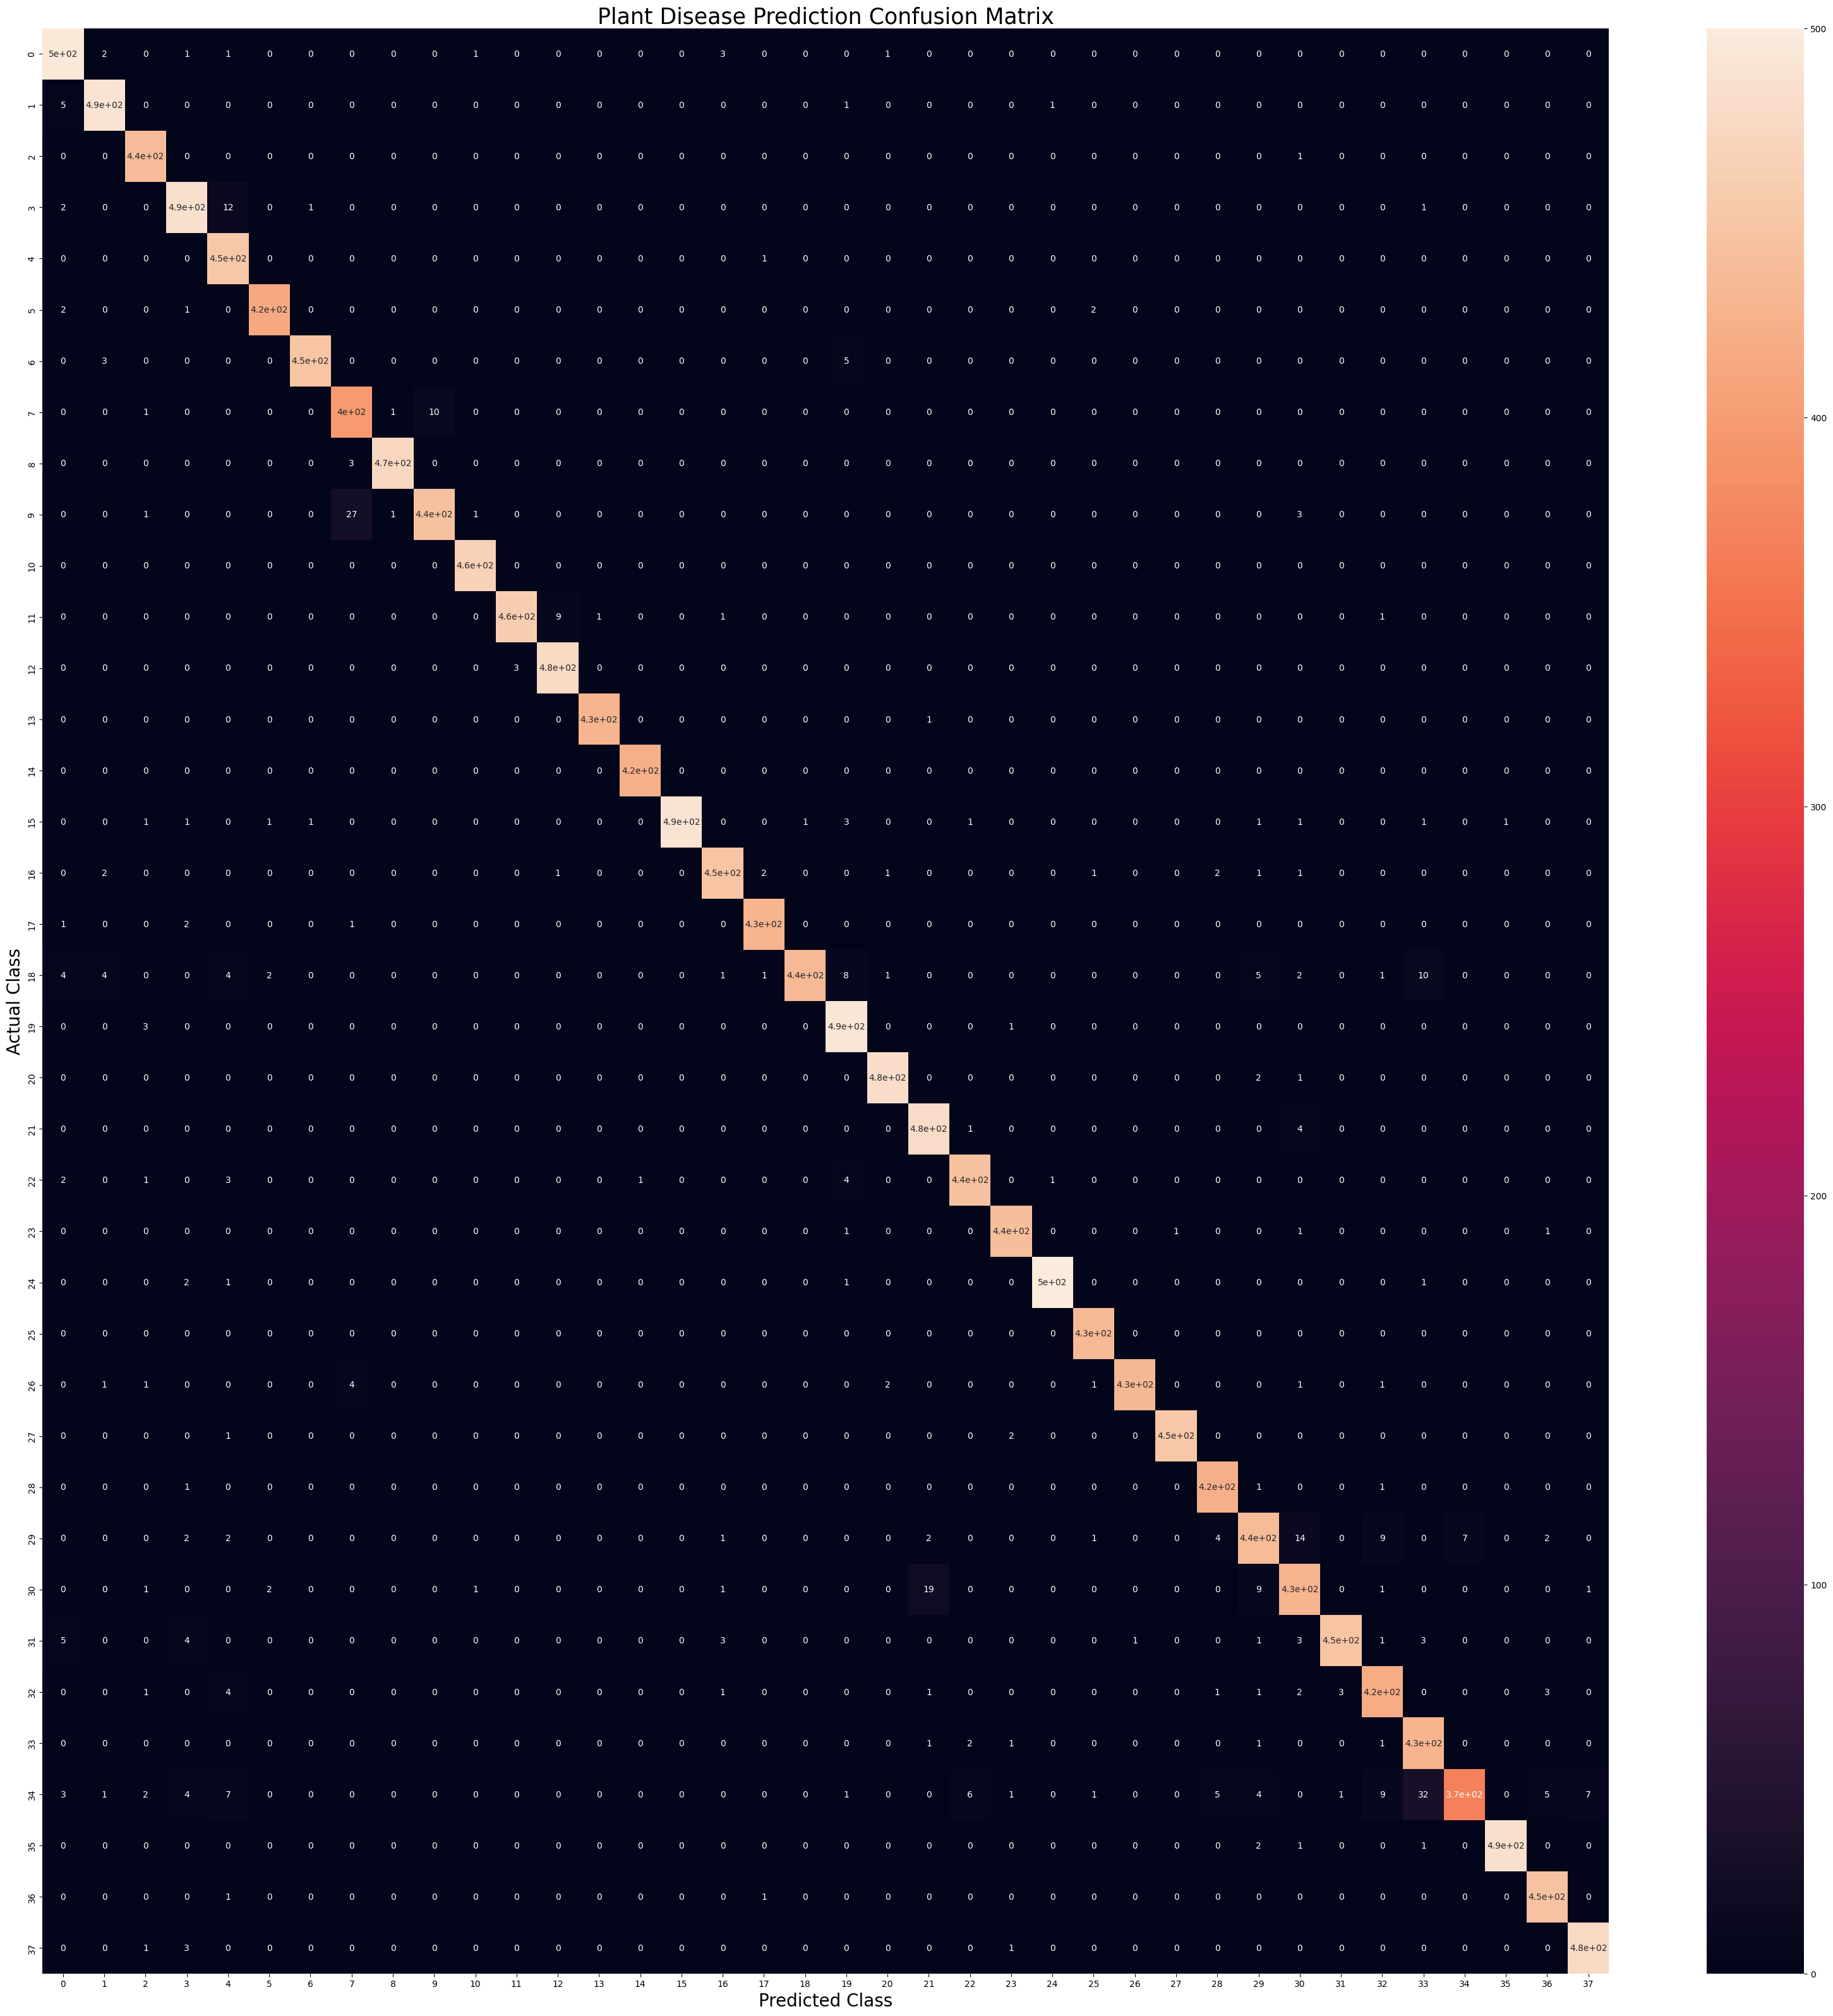

In [42]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()